In [42]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [27]:
df = pd.read_csv("datasets/Advertising.csv")

In [28]:
# Check number of rows and columns
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns)

# Dataset info
df.info()

# Basic statistics
df.describe()


Shape: (200, 5)
Columns: Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [29]:
print(df.isnull().sum())


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [30]:
df = df.dropna()


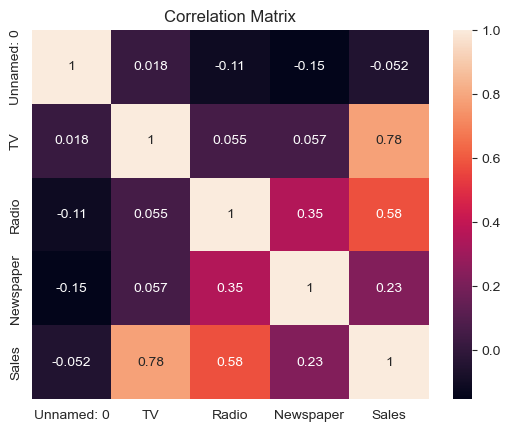

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


In [32]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
y_pred = model.predict(X_test)


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1.4607567168117606
MSE: 3.1740973539761055
R2 Score: 0.899438024100912


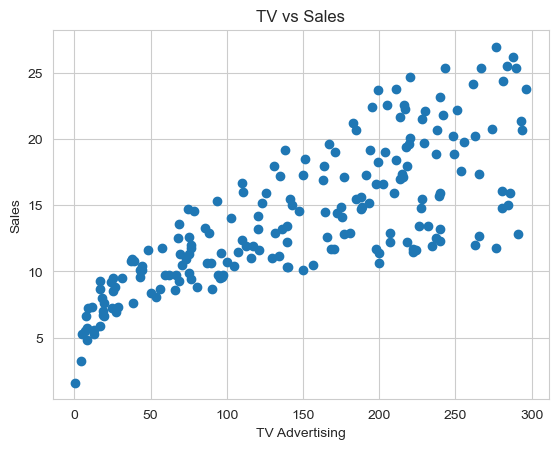

In [37]:
plt.figure()
plt.scatter(df['TV'], df['Sales'])
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.show()


In [38]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 2.9790673381226274
Coefficients: [0.04472952 0.18919505 0.00276111]


In [39]:
comparison = pd.DataFrame({
    "Actual Sales": y_test,
    "Predicted Sales": y_pred
})

print(comparison.head())


     Actual Sales  Predicted Sales
95           16.9        16.408024
15           22.4        20.889882
30           21.4        21.553843
158           7.3        10.608503
128          24.7        22.112373


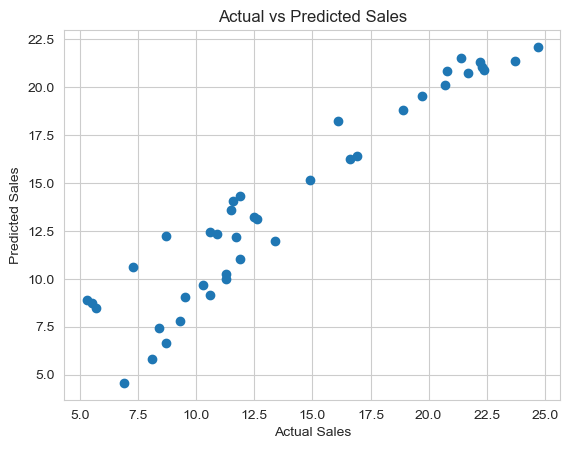

In [40]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [41]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.899438024100912
